In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sp
import seaborn as sns
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold, cross_val_score

%matplotlib inline
np.random.seed(42)
df = pd.read_csv("40403863_features.csv")

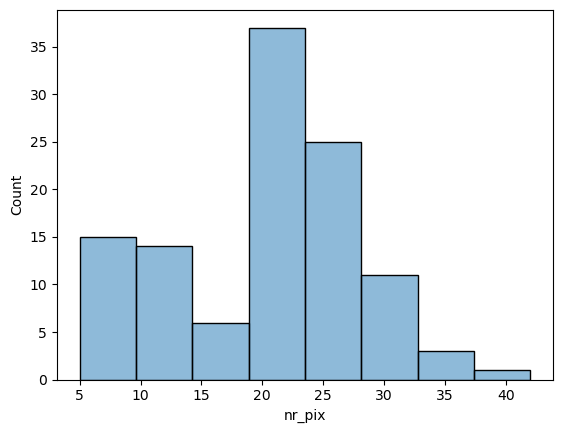

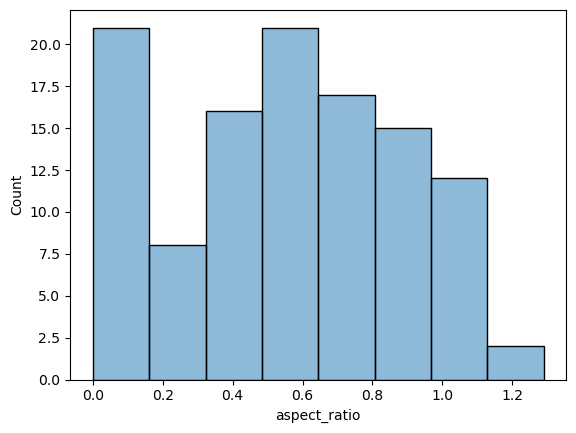

[[ 0.10644168 -1.46600524]] [-0.93101925]
Training Accuracy: 0.5446428571428571
Confusion Matrix:
 [[ 2 13]
 [ 3 10]]
Accuracy Score: 0.42857142857142855
True positive rate (recall): 0.43478260869565216
False positive rate: 0.6
              precision    recall  f1-score   support

           0       0.40      0.13      0.20        15
           1       0.43      0.77      0.56        13

    accuracy                           0.43        28
   macro avg       0.42      0.45      0.38        28
weighted avg       0.42      0.43      0.37        28



In [73]:
# section 1.1

df["letter"] = np.where(df["label"].isin(["a","b","c","d","e","f","g","h","i","j"]), 1, 0)
sampleSet = df.sample(frac=1, random_state = 34).reset_index(drop=True)
train_data = sampleSet[:112] # top 80% like in topic 14 slides
test_data = sampleSet[112:]

sns.histplot(data=train_data, x="nr_pix", alpha=0.5)
plt.show()
plt.clf()
sns.histplot(data=train_data, x="aspect_ratio", alpha=0.5)
plt.show()
plt.clf()

x_train = train_data[["nr_pix", "aspect_ratio"]]
y_train = train_data["letter"]
model = LogisticRegression()
model.fit(x_train, y_train)
print(model.coef_, model.intercept_)

train_preds = (model.predict_proba(x_train)[:, 1] > 0.5).astype(int)
train_accuracy = accuracy_score(y_train, train_preds)
print("Training Accuracy:", train_accuracy)

x_test = test_data[["nr_pix", "aspect_ratio"]]
y_test = test_data["letter"]
test_preds = (model.predict_proba(x_test)[:, 1] > 0.5).astype(int)
test_accuracy = accuracy_score(y_test, test_preds)
cm = confusion_matrix(y_test, test_preds)
print("Confusion Matrix:\n", cm)
print("Accuracy Score:", test_accuracy)
print("True positive rate (recall):", (cm[1][1]/(cm[0][1] + cm[1][1])))
print("False positive rate:", (1 - (cm[0][0] / (cm[0][0] + cm[1][0]))))
print(classification_report(y_test, test_preds, zero_division=0))

In [76]:
# section 1.2

df["letter"] = np.where(df["label"].isin(["a","b","c","d","e","f","g","h","i","j"]), 1, 0)
kfolds = 5
kf = KFold(n_splits=kfolds, shuffle=True, random_state=42)
k_neighbours = 5
accuracy_sum, true_pos_sum, false_pos_sum, precision_sum, recall_sum, f1_sum = [0] * 6

for train_index, test_index in kf.split(df):
    train_data = df.iloc[train_index]
    test_data = df.iloc[test_index]
    x_train = train_data[["nr_pix", "aspect_ratio"]]
    y_train = train_data["letter"]
    x_test = test_data[["nr_pix", "aspect_ratio"]]
    y_test = test_data["letter"]

    knn = KNeighborsClassifier(n_neighbors=k_neighbours)
    knn.fit(x_train, y_train)
    cv_test_preds = (model.predict_proba(x_test)[:, 1] > 0.5).astype(int)
    accuracy = knn.score(x_test, y_test)
    accuracy_sum += accuracy
    cm = confusion_matrix(y_test, cv_test_preds)
    true_pos_sum += cm[1][1]/(cm[0][1] + cm[1][1])
    false_pos_sum += 1 - (cm[0][0] / (cm[0][0] + cm[1][0]))
    precision_sum += precision_score(y_test, cv_test_preds)
    recall_sum += recall_score(y_test, cv_test_preds)
    f1_sum += f1_score(y_test, cv_test_preds)
print("Crossvalidated accuracy:", accuracy_sum/kfolds)
print("True positive rate:", true_pos_sum/kfolds)
print("False positive rate:", false_pos_sum/kfolds)
print("Precision:", precision_sum/kfolds)
print("Recall:", recall_sum/kfolds)
print("F1-Score:", f1_sum/kfolds)

Crossvalidated accuracy: 0.6357142857142858
True positive rate: 0.561338127928517
False positive rate: 0.6053174603174603
Precision: 0.561338127928517
Recall: 0.7253575114256228
F1-Score: 0.6316806722689076
